In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

In [ ]:
bitcoin = yf.download("BTC-USD", start = "2014-01-01", end = "2023-11-21")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366
2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,36596.683594,22445028430
2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,36585.703125,11886022717


In [ ]:
bitcoin.shape

(3352, 6)

In [ ]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
bitcoin.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366
2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,36596.683594,22445028430
2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,36585.703125,11886022717
2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875,37386.546875,12915986553
2023-11-20,37374.074219,37756.820312,36882.531250,37476.957031,37476.957031,20888209068


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3352 entries, 2014-09-17 to 2023-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3352 non-null   float64
 1   High       3352 non-null   float64
 2   Low        3352 non-null   float64
 3   Close      3352 non-null   float64
 4   Adj Close  3352 non-null   float64
 5   Volume     3352 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 183.3 KB


In [ ]:
bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3.352000e+03
mean,14246.646767,14582.696846,13883.165539,14256.334344,14256.334344,1.647969e+10
std,16011.678239,16401.352396,15572.078761,16011.856514,16011.856514,1.917575e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,896.566025,910.066986,864.113754,898.162262,898.162262,1.470975e+08
50%,8160.602783,8288.145020,7928.415039,8164.351074,8164.351074,1.094857e+10
75%,23087.212402,23468.427246,22696.540039,23122.884766,23122.884766,2.695812e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


#Closing Price
######The closing price is the last price at which a security traded during the regular trading day

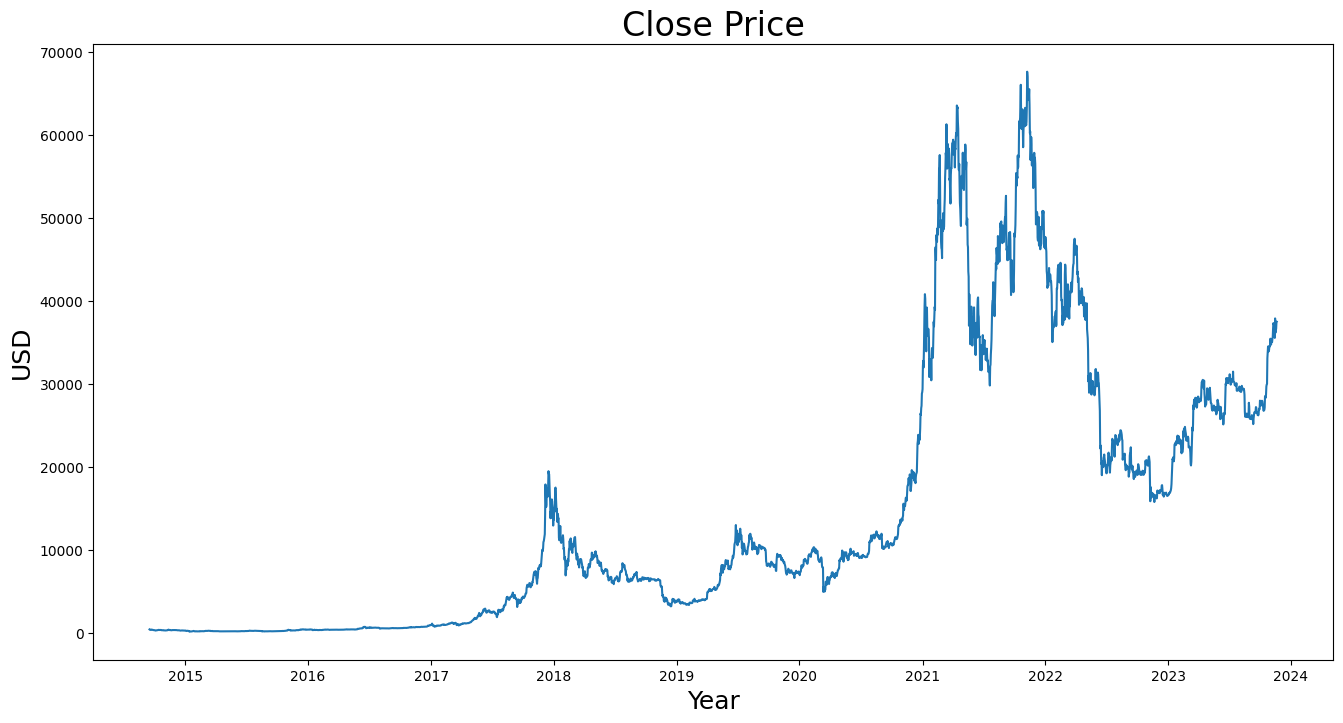

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(bitcoin['Close'])
plt.xlabel('Year', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

#Checking for Null values

In [ ]:
print('Null Values:',bitcoin.isnull().values.sum())

Null Values: 0


In [ ]:
print('NA values:',bitcoin.isnull().values.any())

NA values: False


In [ ]:
# Final shape of the dataset after dealing with null values

bitcoin.shape

(3352, 6)

In [ ]:
#Creat a new dataframe with only Close Price
data = bitcoin.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on. we need this number to create our train and test sets
# math.ceil will round up the number
training_data_len = math.ceil(len(dataset) * .8) # We are using %80 of the data for training
training_data_len

2682

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.54026249],
       [0.55214643],
       [0.55348805]])

#####In this case, we can't use train_test_split function, because we need our train and test sets to be Sequential Data. LSTM network needs to have the last output values of network layer for the input of the next layer of network. So we can't use train_test_split and randomize our train/test data.

Our model will predict the price by looking the last 60 days of price. this will help our model to predict a better price and not just a random number that would have less than %50 accuracy.

In [ ]:
# Create the training dataset
train_data = scaled_data[0:training_data_len, :]
# Split the data into X_train and y_train data sets
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


  if i <= 60:
    print(X_train)
    print(y_train)
    print()


[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]



In [ ]:
len(X_train)

2622

In [ ]:
# Convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape


(2622, 60)

In [ ]:
# Reshape the data because LSTM needs 3 dim
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # we make it like pros. it wanna say "np.reshape(X_train, (2083, 60, 1))"
X_train.shape

(2622, 60, 1)

In [ ]:
# Create the testing dataset
# Create a new array containing scaled values from index 2083
test_data = scaled_data[training_data_len - 60 : , :]

#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

In [ ]:

# Convert the data to a numpy array
X_test = np.array(X_test)

In [ ]:
# Reshape the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM model
tf.random.set_seed(42)

model_1 = Sequential()
model_1.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) , the simple form is "input_shape(60, 1)""
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(25))
model_1.add(Dense(1))


In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model_1.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2622/2622 [==============================] - 92s 32ms/step - loss: 0.0017
Epoch 2/10
2622/2622 [==============================] - 78s 30ms/step - loss: 7.5178e-04
Epoch 3/10
2622/2622 [==============================] - 75s 29ms/step - loss: 5.5252e-04
Epoch 4/10
2622/2622 [==============================] - 77s 29ms/step - loss: 4.1781e-04
Epoch 5/10
2622/2622 [==============================] - 75s 29ms/step - loss: 3.9265e-04
Epoch 6/10
2622/2622 [==============================] - 76s 29ms/step - loss: 5.0901e-04
Epoch 7/10
2622/2622 [==============================] - 77s 29ms/step - loss: 3.1901e-04
Epoch 8/10
2622/2622 [==============================] - 78s 30ms/step - loss: 3.0267e-04
Epoch 9/10
2622/2622 [==============================] - 77s 29ms/step - loss: 3.3346e-04
Epoch 10/10
2622/2622 [==============================] - 75s 29ms/step - loss: 2.6066e-04


In [ ]:
# Get the model_1 predicted price values
predictions_1 = model_1.predict(X_test)
predictions_1 = scaler.inverse_transform(predictions_1)
len(predictions_1)

21/21 [==============================] - 2s 21ms/step


670

In [ ]:
# Get the root mean squared error (RMSE) for model_1
rmse = np.sqrt(np.mean(predictions_1 - y_test)**2)
rmse

224.61156424906716

Text(0.5, 0, 'epochs')

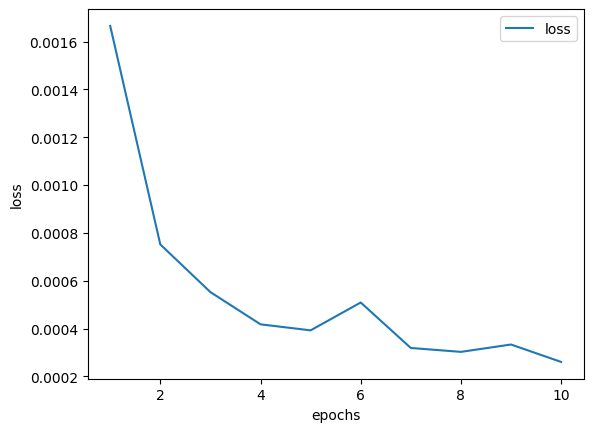

In [ ]:
# Let's plot the history of model_1 and see what's going on
historyForPlot = pd.DataFrame(history.history)
historyForPlot.index += 1 # we plus 1 to the number of indexing so our epochs Plot picture will be counting from 1 not 0.
historyForPlot.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Train the model again with 7 epochs
# but first we need to create another model so we can compare them together

# building LSTM model_2
tf.random.set_seed(42)

model_2 = Sequential()
model_2.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1))) # we made it like pros ;) | the simple form is "input_shape(60, 1)
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(25))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='Adam', loss='mse')

# Fit model_2
history_2 = model_2.fit(X_train, y_train, batch_size=1, epochs=6)

Epoch 1/6
2622/2622 [==============================] - 81s 30ms/step - loss: 0.0019
Epoch 2/6
2622/2622 [==============================] - 80s 30ms/step - loss: 7.7120e-04
Epoch 3/6
2622/2622 [==============================] - 77s 30ms/step - loss: 5.5952e-04
Epoch 4/6
2622/2622 [==============================] - 80s 31ms/step - loss: 4.1833e-04
Epoch 5/6
2622/2622 [==============================] - 79s 30ms/step - loss: 3.8211e-04
Epoch 6/6
2622/2622 [==============================] - 78s 30ms/step - loss: 4.9212e-04


In [ ]:

# Get the model_2 predicted price values
predictions_2 = model_2.predict(X_test)
predictions_2 = scaler.inverse_transform(predictions_2)
len(predictions_2)

21/21 [==============================] - 1s 15ms/step


670

In [ ]:
# Get the root mean squared error (RMSE) for model_2
rmse_2 = np.sqrt(np.mean(predictions_2 - y_test)**2)
rmse_2

676.0297006180037

<ipython-input-33-3dc8d231f6cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_1['Predictions'] = predictions_1
<ipython-input-33-3dc8d231f6cd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_2['Predictions'] = predictions_2


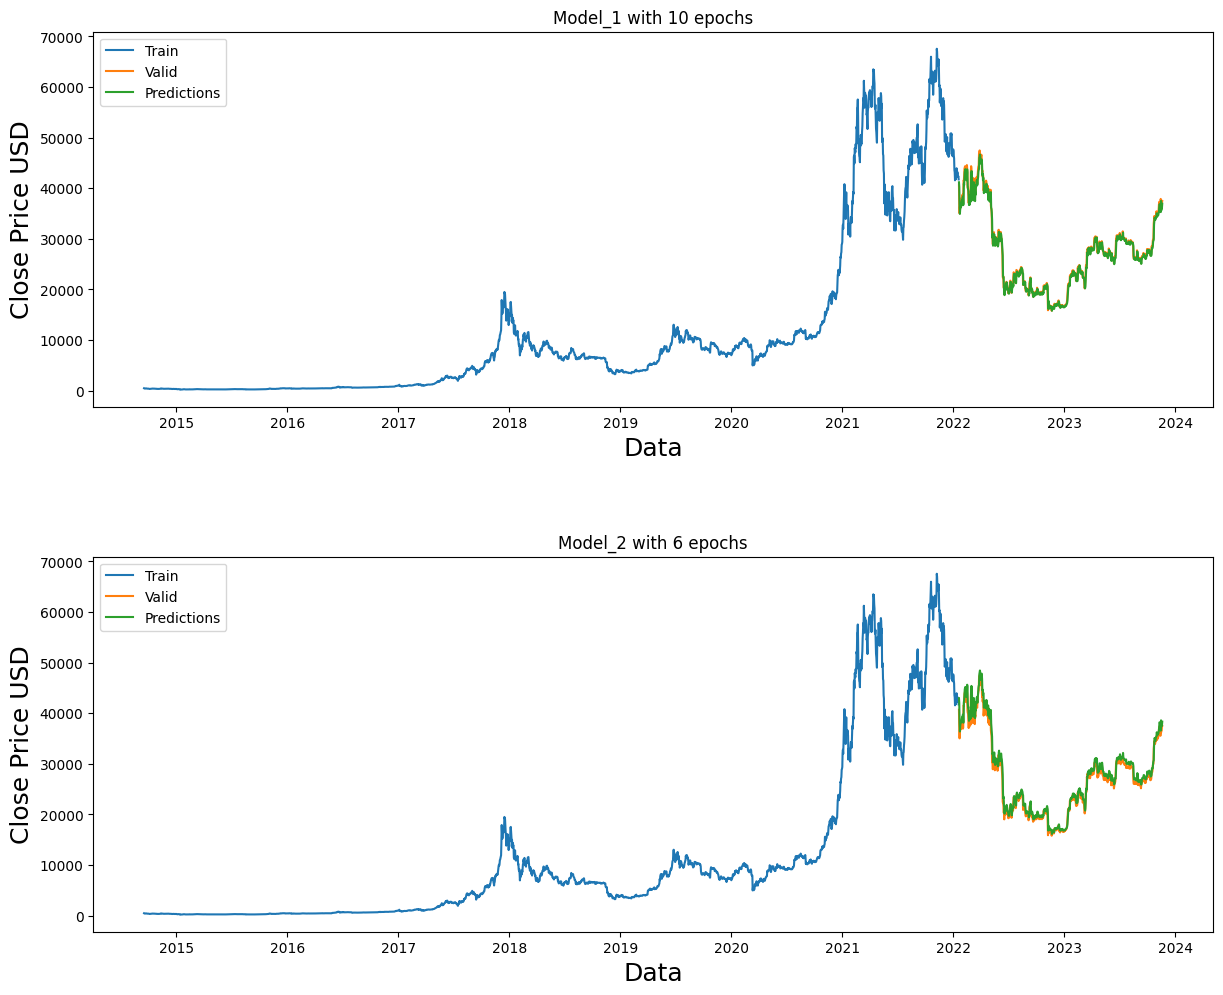

In [ ]:
# Plot the data
train = data[:training_data_len]

#data for model_1
valid_1 = data[training_data_len:]
valid_1['Predictions'] = predictions_1

# data for model_2
valid_2 = data[training_data_len:]
valid_2['Predictions'] = predictions_2

# Visualized the data
#model_1
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model_1 with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_1[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

#model_2
plt.subplot(2, 1, 2)
plt.title('Model_2 with 6 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid_2[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:

#Get the last 60 day closing price values and convert the datadrame to an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# create an empty list
new_X_test = []
# Append the past 60 days
new_X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
new_X_test = np.array(new_X_test)
# Reshape the data
new_X_test = np.reshape(new_X_test, (new_X_test.shape[0], new_X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model_1.predict(new_X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 438ms/step
[[36989.94]]


In [ ]:
model_1.save("model_bitcoin.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('model_bitcoin.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>